In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. Using the kc_house_data.csv dataset

In [ ]:
df_original = pd.read_csv('/content/drive/Shareddrives/modulo4/Tarefa 4: Discretização/kc_house_data.csv')
df_original

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### 2. Delete attributes. Maintain the price, yr_built, yr_renovated, sqft_living, sqft_lot, sqft_lot15 columns

In [ ]:
df = df_original[['price', 'yr_built', 'yr_renovated','sqft_living', 'sqft_lot', 'sqft_lot15', 'condition']].copy()
df.head()

,price,yr_built,yr_renovated,sqft_living,sqft_lot,sqft_lot15,condition
0,221900.0,1955,0,1180,5650,5650,3
1,538000.0,1951,1991,2570,7242,7639,3
2,180000.0,1933,0,770,10000,8062,3
3,604000.0,1965,0,1960,5000,5000,5
4,510000.0,1987,0,1680,8080,7503,3


### 3. Use the “condition” attribute as a class

### 4. Discretize the “condition” attribute. Bad condition (value 0) between 1 and 3, good condition greater than 3 (value 1).


In [ ]:
def classe_condition(variavel):
  if (variavel >= 1 and variavel <= 3):
    return 0
  else:
    return 1

In [ ]:
df['condition'] = pd.to_numeric(df['condition'], errors = 'coerce')
df['classe_condition'] = df['condition'].apply(classe_condition)
df

,price,yr_built,yr_renovated,sqft_living,sqft_lot,sqft_lot15,condition,classe_condition
0,221900.0,1955,0,1180,5650,5650,3,0
1,538000.0,1951,1991,2570,7242,7639,3,0
2,180000.0,1933,0,770,10000,8062,3,0
3,604000.0,1965,0,1960,5000,5000,5,1
4,510000.0,1987,0,1680,8080,7503,3,0
...,...,...,...,...,...,...,...,...
21608,360000.0,2009,0,1530,1131,1509,3,0
21609,400000.0,2014,0,2310,5813,7200,3,0
21610,402101.0,2009,0,1020,1350,2007,3,0
21611,400000.0,2004,0,1600,2388,1287,3,0


### 5. Discretize the yr_renovated attribute (0 was not renewed, 1 was)

In [ ]:
def classe_renovated(variavel):
  if (variavel == 0):
    return 'nao-renovado'
  else:
    return 'renovado'

In [ ]:
df['yr_renovated'] = pd.to_numeric(df['yr_renovated'], errors = 'coerce')
df['classe_renovated'] = df['yr_renovated'].apply(classe_renovated)
df

,price,yr_built,yr_renovated,sqft_living,sqft_lot,sqft_lot15,condition,classe_condition,classe_renovated
0,221900.0,1955,0,1180,5650,5650,3,0,nao-renovado
1,538000.0,1951,1991,2570,7242,7639,3,0,renovado
2,180000.0,1933,0,770,10000,8062,3,0,nao-renovado
3,604000.0,1965,0,1960,5000,5000,5,1,nao-renovado
4,510000.0,1987,0,1680,8080,7503,3,0,nao-renovado
...,...,...,...,...,...,...,...,...,...
21608,360000.0,2009,0,1530,1131,1509,3,0,nao-renovado
21609,400000.0,2014,0,2310,5813,7200,3,0,nao-renovado
21610,402101.0,2009,0,1020,1350,2007,3,0,nao-renovado
21611,400000.0,2004,0,1600,2388,1287,3,0,nao-renovado


### 6. Find the importance of each attribute using three methods.(compare)

In [ ]:
df.values

array([[221900.0, 1955, 0, ..., 'pequeno', 'medio', 'medio'],
       [538000.0, 1951, 1991, ..., 'pequeno', 'medio', 'medio'],
       [180000.0, 1933, 0, ..., 'pequeno', 'grande', 'medio'],
       ...,
       [402101.0, 2009, 0, ..., 'pequeno', 'pequeno', 'pequeno'],
       [400000.0, 2004, 0, ..., 'pequeno', 'pequeno', 'pequeno'],
       [325000.0, 2008, 0, ..., 'pequeno', 'pequeno', 'pequeno']],
      dtype=object)

In [ ]:
array_n = df.values

X = array_n[:,0:6]
Y = array_n[:,6].astype('int')

In [ ]:
def select_feature(df, function, valor):

  test = SelectKBest(function, k = valor)
  fit = test.fit(X, Y)

  np.set_printoptions(precision = 3)
  print(fit.scores_)

  features = fit.transform(X)

  print(features[0:valor,:])

  print("Features sorted by their score:")
  print(sorted(zip(map(lambda x: round(x, valor), fit.scores_), df.columns), reverse = True))

  feature_importance = fit.scores_

  feature_importance = 100.0 * (feature_importance / feature_importance.max())
  sorted_idx = np.argsort(feature_importance)
  pos = np.arange(sorted_idx.shape[0]) + .5
  plt.subplot(1, 2, 2)
  plt.barh(pos, feature_importance[sorted_idx], align = 'center')
  m_name = np.array(df.columns)
  plt.yticks(pos, m_name[sorted_idx])
  plt.xlabel('Importância Relativa')
  plt.show()

[  37.412 1065.033   26.103   80.151    9.8      6.252]
[[221900.0 1955 0 1180 5650 5650]
 [538000.0 1951 1991 2570 7242 7639]
 [180000.0 1933 0 770 10000 8062]
 [604000.0 1965 0 1960 5000 5000]
 [510000.0 1987 0 1680 8080 7503]
 [1225000.0 2001 0 5420 101930 101930]]
Features sorted by their score:
[(1065.03278, 'yr_built'), (80.150869, 'sqft_living'), (37.41154, 'price'), (26.103406, 'yr_renovated'), (9.800492, 'sqft_lot'), (6.251946, 'sqft_lot15')]


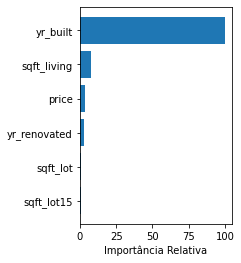

In [ ]:
select_feature(df, f_classif, 6)

[0.011 0.156 0.005 0.018 0.04  0.049]
[[221900.0 1955 0 1180 5650 5650]
 [538000.0 1951 1991 2570 7242 7639]
 [180000.0 1933 0 770 10000 8062]
 [604000.0 1965 0 1960 5000 5000]
 [510000.0 1987 0 1680 8080 7503]
 [1225000.0 2001 0 5420 101930 101930]]
Features sorted by their score:
[(0.156455, 'yr_built'), (0.048743, 'sqft_lot15'), (0.040093, 'sqft_lot'), (0.017932, 'sqft_living'), (0.011064, 'price'), (0.004899, 'yr_renovated')]


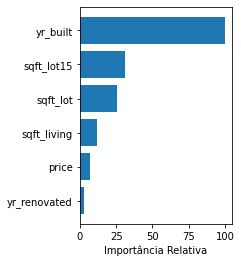

In [ ]:
select_feature(df, mutual_info_classif, 6)

[3.710e+07 1.558e+03 1.987e+05 1.281e+05 4.445e+06 1.459e+06]
[[221900.0 1955 0 1180 5650 5650]
 [538000.0 1951 1991 2570 7242 7639]
 [180000.0 1933 0 770 10000 8062]
 [604000.0 1965 0 1960 5000 5000]
 [510000.0 1987 0 1680 8080 7503]
 [1225000.0 2001 0 5420 101930 101930]]
Features sorted by their score:
[(37095147.334508, 'price'), (4444825.202045, 'sqft_lot'), (1458724.051057, 'sqft_lot15'), (198677.520691, 'yr_renovated'), (128148.119962, 'sqft_living'), (1558.023033, 'yr_built')]


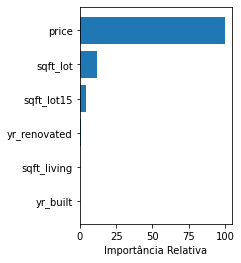

In [ ]:
select_feature(df, chi2, 6)

### 7. Normalize the data and again find the importance of each attribute using three methods. (compare)

In [ ]:
def normalize_column(_df):

  serie = pd.to_numeric(_df, errors='coerce')

  new_serie = (serie - min(serie)) / (max(serie) - min(serie))

  return new_serie

In [ ]:
df_norm = pd.DataFrame()

In [ ]:
df_norm['norm_price'] = normalize_column(df['price'])
df_norm['norm_yr_built'] = normalize_column(df['yr_built'])
df_norm['norm_yr_renovated'] = normalize_column(df['yr_renovated'])
df_norm['norm_sqft_living'] = normalize_column(df['sqft_living'])
df_norm['norm_sqft_lot'] = normalize_column(df['sqft_lot'])
df_norm['norm_sqft_lot15'] = normalize_column(df['sqft_lot15'])

In [ ]:
df_norm

,norm_price,norm_yr_built,norm_yr_renovated,norm_sqft_living,norm_sqft_lot,norm_sqft_lot15
0,0.019266,0.478261,0.000000,0.067170,0.003108,0.005742
1,0.060721,0.443478,0.988089,0.172075,0.004072,0.008027
2,0.013770,0.286957,0.000000,0.036226,0.005743,0.008513
3,0.069377,0.565217,0.000000,0.126038,0.002714,0.004996
4,0.057049,0.756522,0.000000,0.104906,0.004579,0.007871
...,...,...,...,...,...,...
21608,0.037377,0.947826,0.000000,0.093585,0.000370,0.000986
21609,0.042623,0.991304,0.000000,0.152453,0.003206,0.007523
21610,0.042898,0.947826,0.000000,0.055094,0.000503,0.001558
21611,0.042623,0.904348,0.000000,0.098868,0.001132,0.000731


In [ ]:
# Looking for the importance of normalized attributes

In [ ]:
array_n = df_norm.values

X = array_n[:,0:5]
Y = array_n[:,5].astype('int')

[1.172e+00 1.187e+00 4.415e-02 1.424e+01 4.358e+02]
[[0.019 0.478 0.    0.067 0.003]
 [0.061 0.443 0.988 0.172 0.004]
 [0.014 0.287 0.    0.036 0.006]
 [0.069 0.565 0.    0.126 0.003]
 [0.057 0.757 0.    0.105 0.005]]
Features sorted by their score:
[(435.79435, 'norm_sqft_lot'), (14.24345, 'norm_sqft_living'), (1.18652, 'norm_yr_built'), (1.17185, 'norm_price'), (0.04415, 'norm_yr_renovated')]


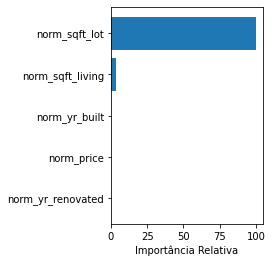

In [ ]:
select_feature(df_norm, f_classif, 5)

[1.332e-15 6.941e-05 1.332e-15 1.332e-15 1.332e-15]
[[0.019 0.478 0.    0.067 0.003]
 [0.061 0.443 0.988 0.172 0.004]
 [0.014 0.287 0.    0.036 0.006]
 [0.069 0.565 0.    0.126 0.003]
 [0.057 0.757 0.    0.105 0.005]]
Features sorted by their score:
[(7e-05, 'norm_yr_built'), (0.0, 'norm_yr_renovated'), (0.0, 'norm_sqft_lot'), (0.0, 'norm_sqft_living'), (0.0, 'norm_price')]


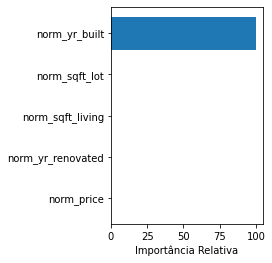

In [ ]:
select_feature(df_norm, mutual_info_classif, 5)

[ 0.045  0.125  0.042  0.506 30.436]
[[0.019 0.478 0.    0.067 0.003]
 [0.061 0.443 0.988 0.172 0.004]
 [0.014 0.287 0.    0.036 0.006]
 [0.069 0.565 0.    0.126 0.003]
 [0.057 0.757 0.    0.105 0.005]]
Features sorted by their score:
[(30.43633, 'norm_sqft_lot'), (0.5063, 'norm_sqft_living'), (0.12537, 'norm_yr_built'), (0.04454, 'norm_price'), (0.04189, 'norm_yr_renovated')]


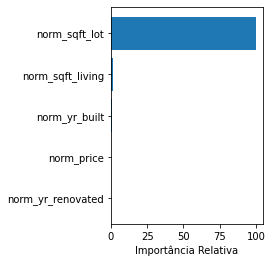

In [ ]:
select_feature(df_norm, chi2, 5)

### 8. Discretize the attributes and again find the importance of each attribute using three methods. (compare)

In [ ]:
def classe_price(variavel):
  if (variavel <= 500000):
    return 'barato'
  elif (variavel > 500000 and variavel <= 1000000):
    return 'medio'
  else:
    return 'caro'

In [ ]:
df['price'] = pd.to_numeric(df['price'], errors = 'coerce')
df['classe_price'] = df['price'].apply(classe_price)

In [ ]:
def classfying_yr_built(year):
  if ( year >= 2000):
    return 'seculo_21'
  else: #abaixo de 2000
    return 'seculo_20'

In [ ]:
df['classe_century'] = df.apply(lambda row: classfying_yr_built(row['yr_built']), axis = 'columns')

In [ ]:
def classfying_sqft_living(sqft):
  if ( sqft <= 4513):
    return 'pequeno'
  elif ( sqft <= 9026):
    return 'medio'
  else:
    return 'grande'

In [ ]:
df['classe_sqft_living'] = df.apply(lambda row: classfying_sqft_living(row['sqft_living']), axis = 'columns')

In [ ]:
def classe_size_lot(size):
  if (size <=5612.0):
    return 'pequeno'
  elif (size > 5612.0 and size <= 8520.2):
    return 'medio'
  else:
    return 'grande'

In [ ]:
df['classe_sqft_lot'] = df['sqft_lot'].apply(classe_size_lot)
df['classe_sqft_lot15'] = df['sqft_lot15'].apply(classe_size_lot)
df

,price,yr_built,yr_renovated,sqft_living,sqft_lot,sqft_lot15,condition,classe_condition,classe_renovated,classe_price,classe_century,classe_sqft_living,classe_sqft_lot,classe_sqft_lot15
0,221900.0,1955,0,1180,5650,5650,3,0,nao-renovado,barato,seculo_20,pequeno,medio,medio
1,538000.0,1951,1991,2570,7242,7639,3,0,renovado,medio,seculo_20,pequeno,medio,medio
2,180000.0,1933,0,770,10000,8062,3,0,nao-renovado,barato,seculo_20,pequeno,grande,medio
3,604000.0,1965,0,1960,5000,5000,5,1,nao-renovado,medio,seculo_20,pequeno,pequeno,pequeno
4,510000.0,1987,0,1680,8080,7503,3,0,nao-renovado,medio,seculo_20,pequeno,medio,medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,2009,0,1530,1131,1509,3,0,nao-renovado,barato,seculo_21,pequeno,pequeno,pequeno
21609,400000.0,2014,0,2310,5813,7200,3,0,nao-renovado,barato,seculo_21,pequeno,medio,medio
21610,402101.0,2009,0,1020,1350,2007,3,0,nao-renovado,barato,seculo_21,pequeno,pequeno,pequeno
21611,400000.0,2004,0,1600,2388,1287,3,0,nao-renovado,barato,seculo_21,pequeno,pequeno,pequeno


In [ ]:
df_2 = pd.get_dummies(df, columns = ['classe_price', 'classe_century', 'classe_renovated', 'classe_sqft_living', 'classe_sqft_lot', 'classe_sqft_lot15'])

In [ ]:
array_n = df_2.values

X = array_n[:,7:23]
Y = array_n[:,23].astype(int)

In [ ]:
def select_feature_2(df, function, valor):
  #Feature extraction
  test = SelectKBest(function, k = valor) #select only the 4 most important features
  fit = test.fit(X, Y)

  #Summarize scores
  np.set_printoptions(precision = 3)
  print(fit.scores_)

  features = fit.transform(X)

  #Summarize select features
  print(features[0:valor,:])

  print("Features sorted by their score:")
  print(sorted(zip(map(lambda x: round(x, valor), fit.scores_), df.columns[7:23]), reverse = True))

  #plot feature importance
  feature_importance = fit.scores_

  #make importances relative to max importance
  feature_importance = 100.0 * (feature_importance / feature_importance.max())
  sorted_idx = np.argsort(feature_importance)
  pos = np.arange(sorted_idx.shape[0]) + .5
  plt.subplot(1, 2, 2)
  plt.barh(pos, feature_importance[sorted_idx], align = 'center')
  m_name = np.array(df.columns[7:23])
  plt.yticks(pos, m_name[sorted_idx])
  plt.xlabel('Importância Relativa')
  plt.show()

[2.939e+02 3.892e+01 8.890e+01 1.307e+02 2.543e+03 2.543e+03 3.035e+00
 3.035e+00 2.562e+00 1.338e+02 1.365e+02 7.676e+03 2.110e+03 5.411e+04
 7.629e+03 5.477e+03]
[[1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 1. 0. 1. 0.]]
Features sorted by their score:
[(54112.208568, 'classe_sqft_lot_pequeno'), (7675.780142, 'classe_sqft_lot_grande'), (7629.259404, 'classe_sqft_lot15_grande'), (5477.39797, 'classe_sqft_lot15_medio'), (2542.574586, 'classe_century_seculo_21'), (2542.574586, 'classe_century_seculo_20'), (2110.129789, 'classe_sqft_lot_medio'), (293.878312, 'classe_condition'), (136.489816, 'classe_sqft_living_pequeno'), (133.829226, 'classe_sqft_living_medio'), (130.704509, 'classe_price_medio'), (88.89628, 'classe_price_caro'), (38.921614, 'classe_price_barato'), (3.034895, 'classe_renovated_renovado'), (3.034895, 'classe_renovated_nao-renovado'), (2.561512, 'classe_sqft_living_grande')]


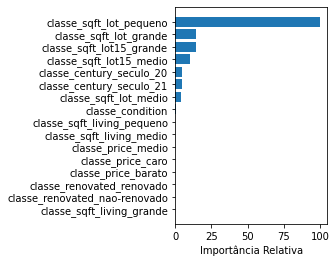

In [ ]:
select_feature_2(df_2, f_classif, 6)

[0.007 0.002 0.    0.003 0.049 0.047 0.    0.004 0.001 0.003 0.003 0.169
 0.052 0.379 0.182 0.14 ]
[[1. 0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0. 1.]
 [1. 1. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0.]
 [1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]]
Features sorted by their score:
[(0.378852, 'classe_sqft_lot_pequeno'), (0.181534, 'classe_sqft_lot15_grande'), (0.169039, 'classe_sqft_lot_grande'), (0.139748, 'classe_sqft_lot15_medio'), (0.051867, 'classe_sqft_lot_medio'), (0.049487, 'classe_century_seculo_20'), (0.047449, 'classe_century_seculo_21'), (0.007349, 'classe_condition'), (0.003986, 'classe_renovated_renovado'), (0.00346, 'classe_sqft_living_pequeno'), (0.003158, 'classe_sqft_living_medio'), (0.002628, 'classe_price_medio'), (0.001923, 'classe_price_barato'), (0.001036, 'classe_sqft_living_grande'), (0.0, 'classe_renovated_nao-renovado'), (0.0, 'classe_price_caro')]


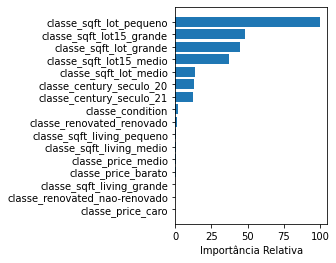

In [ ]:
select_feature_2(df_2, mutual_info_classif, 6)

[1.910e+02 1.628e+01 8.254e+01 8.431e+01 5.010e+02 1.774e+03 1.283e-01
 2.906e+00 2.561e+00 1.308e+02 2.285e+00 3.399e+03 1.346e+03 1.081e+04
 3.500e+03 2.965e+03]
[[0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 1.]
 [1. 1. 0. 0. 1. 0.]]
Features sorted by their score:
[(10808.40564, 'classe_sqft_lot_pequeno'), (3499.669923, 'classe_sqft_lot15_grande'), (3398.786633, 'classe_sqft_lot_grande'), (2965.330077, 'classe_sqft_lot15_medio'), (1774.170193, 'classe_century_seculo_21'), (1346.166662, 'classe_sqft_lot_medio'), (500.965702, 'classe_century_seculo_20'), (190.95153, 'classe_condition'), (130.814557, 'classe_sqft_living_medio'), (84.314031, 'classe_price_medio'), (82.538747, 'classe_price_caro'), (16.275226, 'classe_price_barato'), (2.906412, 'classe_renovated_renovado'), (2.560734, 'classe_sqft_living_grande'), (2.284507, 'classe_sqft_living_pequeno'), (0.128338, 'classe_renovated_nao-renovado')]


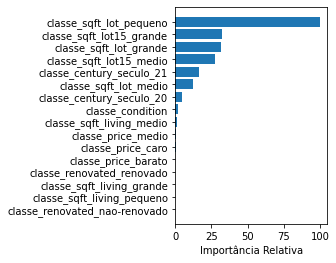

In [ ]:
select_feature_2(df_2, chi2, 6)

Comparing the graphs above, we can see that the most important attributes (*features*) are those associated with:
* sqft_lot;
* sqft_lo15;
* yr_built, which generated the class corresponding to the century in which the house was built;
* condition.

Therefore, only these 4 columns from the original *dataset* will be kept.




### 9. Reduce the dimensions of the DataFrame.

In [ ]:
df_final = df[['classe_sqft_lot', 'classe_sqft_lot15', 'classe_century', 'classe_condition']].copy()

### 10. Store in a new .csv file.

In [ ]:
df_final.to_csv('import.csv', sep = ';')